In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv (r'real_estate.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [20]:
X = df.iloc[:,1:7]
y = df.iloc[:,-1]

In [23]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
 #print(iteration)
 # Hypothesis Values
        h = X.dot(B)
 # Difference b/w Hypothesis and Actual Y
        loss = h - Y
 # Gradient Calculation
        gradient = X.T.dot(loss) / m
 # Changing Values of B using Gradient
        B = B - alpha * gradient
 # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history


In [68]:
m = 380
f = 6
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[m:]

In [70]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 6000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

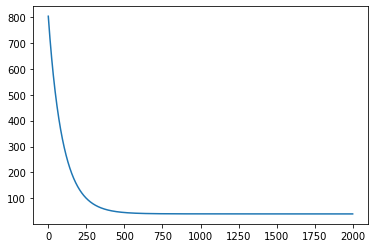

In [54]:
plt.plot(cost_history)

In [71]:
def pred(x_test, newB):

    return x_test.dot(newB)

y_ = pred(X_test,newB)

In [72]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
#----------------
r2(y_,y_test)


0.5205403359233509

In [37]:
B = np.zeros(X.shape[1])
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X, y, B, alpha, iter_)

In [38]:
newB

array([ 1.4201332 , -3.07676722, -5.04535764,  3.45378126,  2.94171394,
        0.25526927])

In [39]:
cost_history

[812.3040117082761,
 811.0489851092582,
 809.8262467878653,
 808.6349483245066,
 807.4742637508785,
 806.3433889543793,
 805.2415410983313,
 804.1679580576017,
 803.1218978692058,
 802.1026381974978,
 801.1094758135617,
 800.1417260884239,
 799.1987224997208,
 798.2798161514653,
 797.3843753065624,
 796.5117849317368,
 795.6614462545416,
 794.832776332129,
 794.0252076314674,
 793.2381876207063,
 792.4711783713856,
 791.7236561712086,
 790.9951111470931,
 790.2850468982306,
 789.5929801388841,
 788.9184403506722,
 788.2609694440794,
 787.620121428956,
 786.995462093761,
 786.3865686933224,
 785.7930296448834,
 785.21444423222,
 784.650422317608,
 784.1005840614401,
 783.5645596492824,
 783.0419890261765,
 782.5325216379935,
 782.0358161796534,
 781.5515403500277,
 781.0793706133463,
 780.6189919669358,
 780.1700977151261,
 779.7323892491522,
 779.3055758329028,
 778.8893743943495,
 778.4835093225159,
 778.087712269832,
 777.7017219597349,
 777.325283999374,
 776.9581506972881,
 776.600